# Exercise 3 神经网络

In [2]:
## Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     lrCostFunction.m (logistic regression cost function)
#     oneVsAll.m
#     predictOneVsAll.m
#     predict.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

import numpy as np
import scipy.io as scio # to read the .mat file
import library as lib
## Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

# 加载和展示数据

Loading and Visualizing Data ...



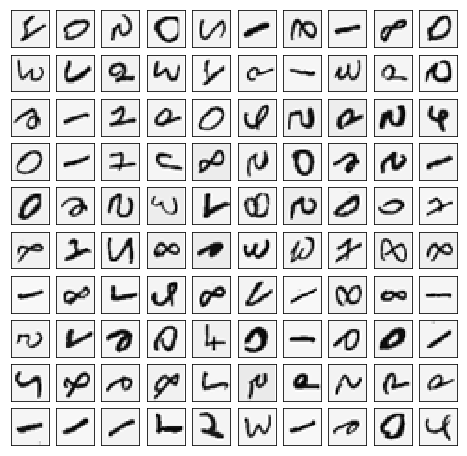

In [4]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

data = scio.loadmat('ex3data1.mat');
X = data['X']
y = data['y']
m = len(X)

# Randomly select 100 data points to display
sel = np.random.permutation(range(m));
sel = sel[:100];

lib.displayData(X[sel, :])



# 加载参数

In [71]:
## ================ Part 2: Loading Pameters ================
# In this part of the exercise, we load some pre-initialized 
# neural network parameters.

print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
param = scio.loadmat('ex3weights.mat');
Theta1 = param['Theta1']
Theta2 = param['Theta2']


Loading Saved Neural Network Parameters ...



In [72]:
Theta1.shape

(25, 401)

In [73]:
Theta2.shape

(10, 26)

In [74]:
X.shape

(5000, 400)

# 预测

In [75]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def predict(Theta1, Theta2, X):
    #PREDICT Predict the label of an input given a trained neural network
    #   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
    #   trained weights of a neural network (Theta1, Theta2)

    # Useful values
    m = len(X);
    num_labels = len(Theta2);
    
    # Add ones to the X data matrix
    X = np.column_stack((np.ones((m,1)),X))

    # You need to return the following variables correctly 
    p = np.zeros((len(X), 1));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned neural network. You should set p to a 
    #               vector containing labels between 1 to num_labels.
    #
    # Hint: The max function might come in useful. In particular, the max
    #       function can also return the index of the max element, for more
    #       information see 'help max'. If your examples are in rows, then, you
    #       can use max(A, [], 2) to obtain the max for each row.
    #
    h1 = sigmoid(np.dot(X,Theta1.T))
    #print(h1.shape)
    #print(Theta2.shape[1])
    h1 = np.column_stack((np.ones((h1.shape[0],1)),h1))
    h2 = sigmoid(np.dot(h1,Theta2.T))
    p = np.argmax(h2, axis = 1) #p: 5000*10
    #print(p)
    p=p+1
    return p

   # =========================================================================


In [ ]:
## ================= Part 3: Implement Predict =================
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X);

#print('\nTraining Set Accuracy: %f\n'%np.mean((np.double(pred == y)) * 100));
compare = np.column_stack((pred,y))
print('\nTraining Set Accuracy: %f\n'%( np.mean(np.double(compare[:,0]==compare[:,1]))* 100));


#  To give you an idea of the network's output, you can also run
#  through the examples one at the a time to see what it is predicting.

#  Randomly permute examples

rp = np.random.permutation(range(m));

#for i in range(m):
for i in range(100):
    # Display 
    print('\nDisplaying Example Image %d\n'%i);
    X_pred = X[rp[i], :].reshape(1,X.shape[1])
    lib.plot_an_image(X_pred) #X[rp[i], :].shape； (400,1)
    #plt.show()
    
    
    pred = predict(Theta1, Theta2, X_pred)
    print('\nNeural Network Prediction: %d (digit %d)\n'%(pred, np.mod(pred, 10)));
    
